# COGS 189 Analysis

In [46]:
# import matplotlib.patches as patches
# import seaborn as sns
# import scipy.signal as signal 
# import sklearn

# from scipy.io import loadmat
# from pathlib import Path
# from numpy import genfromtxt

import numpy as np   
import matplotlib.pyplot as plt    
import pandas as pd
import os

import mne

In [112]:
sampleRate = 250.0

if(os.path.exists("out.txt")):
    os.remove("out.txt")
if(os.path.exists("out.csv")):
    os.remove("out.csv")
    
with open("ex.txt", "r") as f:
    with open("out.txt", "w") as o:
        o.write("temp,eeg0,eeg1,eeg2,eeg3,eeg4,eeg5,eeg6,eeg7,aux0,aux1,aux2,time0,time1\n")
        for line in f:
            if("%" not in line):
                o.write(line)

os.rename("out.txt", "out.csv")

In [113]:
data = pd.read_csv("out.csv")
data.head()

,temp,eeg0,eeg1,eeg2,eeg3,eeg4,eeg5,eeg6,eeg7,aux0,aux1,aux2,time0,time1
0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.014,0.826,0.532,12:14:49.064,1557936889064
1,1,45997.52,37487.45,-22369.71,-26183.10,-12716.55,-24777.78,-10055.49,-3746.69,0.000,0.000,0.000,12:14:49.071,1557936889071
2,2,46077.20,37578.29,-22259.92,-26035.54,-12632.74,-24711.80,-9977.57,-3650.20,0.000,0.000,0.000,12:14:49.071,1557936889071
3,3,46157.87,37690.05,-22231.69,-25992.17,-12616.84,-24741.10,-9976.90,-3649.79,0.000,0.000,0.000,12:14:49.079,1557936889079
4,4,46112.07,37644.58,-22285.94,-26075.70,-12653.59,-24794.54,-10017.76,-3706.21,0.000,0.000,0.000,12:14:49.079,1557936889079


In [114]:
data = data.drop(columns=['temp', 'time0'])
#data = data.drop(columns=['temp', 'time0', 'time1'])
data = data.T
data

,0,1,2,3,4,5,6,7,8,9,...,175943,175944,175945,175946,175947,175948,175949,175950,175951,175952
eeg0,0.000000e+00,4.599752e+04,4.607720e+04,4.615787e+04,4.611207e+04,4.600286e+04,4.604998e+04,4.614399e+04,4.611404e+04,4.600688e+04,...,4.249156e+04,4.242459e+04,4.235747e+04,4.244520e+04,4.249008e+04,4.245559e+04,4.237955e+04,4.244592e+04,4.250361e+04,4.247336e+04
eeg1,0.000000e+00,3.748745e+04,3.757829e+04,3.769005e+04,3.764458e+04,3.750039e+04,3.754373e+04,3.767261e+04,3.764990e+04,3.751604e+04,...,3.690002e+04,3.683006e+04,3.677365e+04,3.685814e+04,3.689209e+04,3.685074e+04,3.677734e+04,3.684430e+04,3.689294e+04,3.685452e+04
eeg2,0.000000e+00,-2.236971e+04,-2.225992e+04,-2.223169e+04,-2.228594e+04,-2.236629e+04,-2.228444e+04,-2.224528e+04,-2.228847e+04,-2.237508e+04,...,-1.912420e+04,-1.919304e+04,-1.924259e+04,-1.912748e+04,-1.912096e+04,-1.915886e+04,-1.923817e+04,-1.913423e+04,-1.909487e+04,-1.914465e+04
eeg3,0.000000e+00,-2.618310e+04,-2.603554e+04,-2.599217e+04,-2.607570e+04,-2.619193e+04,-2.607561e+04,-2.600621e+04,-2.607145e+04,-2.619526e+04,...,-2.187261e+04,-2.196410e+04,-2.201515e+04,-2.187581e+04,-2.186852e+04,-2.194452e+04,-2.203146e+04,-2.190368e+04,-2.185826e+04,-2.192617e+04
eeg4,0.000000e+00,-1.271655e+04,-1.263274e+04,-1.261684e+04,-1.265359e+04,-1.271246e+04,-1.264950e+04,-1.262710e+04,-1.265726e+04,-1.271819e+04,...,-7.587340e+03,-7.629230e+03,-7.671610e+03,-7.589470e+03,-7.579250e+03,-7.609830e+03,-7.677980e+03,-7.593600e+03,-7.576410e+03,-7.597670e+03
eeg5,0.000000e+00,-2.477778e+04,-2.471180e+04,-2.474110e+04,-2.479454e+04,-2.477841e+04,-2.471638e+04,-2.474691e+04,-2.479685e+04,-2.479620e+04,...,-2.190212e+04,-2.193178e+04,-2.189128e+04,-2.186065e+04,-2.190158e+04,-2.195370e+04,-2.189657e+04,-2.185402e+04,-2.188602e+04,-2.192619e+04
eeg6,0.000000e+00,-1.005549e+04,-9.977570e+03,-9.976900e+03,-1.001776e+04,-1.004425e+04,-9.982600e+03,-9.982800e+03,-1.002076e+04,-1.005205e+04,...,-3.720070e+03,-3.754060e+03,-3.762130e+03,-3.700310e+03,-3.708800e+03,-3.740270e+03,-3.772770e+03,-3.700730e+03,-3.697200e+03,-3.730860e+03
eeg7,0.000000e+00,-3.746690e+03,-3.650200e+03,-3.649790e+03,-3.706210e+03,-3.734910e+03,-3.659380e+03,-3.657170e+03,-3.705920e+03,-3.743560e+03,...,4.697900e+02,4.199900e+02,4.171100e+02,4.910900e+02,4.768500e+02,4.300000e+02,4.024900e+02,4.885900e+02,4.938600e+02,4.499000e+02
aux0,1.400000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-02,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
aux1,8.260000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.360000e-01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.180000e-01,0.000000e+00


In [115]:
sfreq = 1000
ch_types = []
ch_names = []

num_channels = data.shape[0]
num_eeg = 8
num_aux = 3
num_time = 1
eeg_channel = "eeg"
aux_channel = "bio" #change
time_channel = "grad" #change

for i in range(num_eeg):
    ch_types.append(eeg_channel)
for i in range(num_aux):
    ch_types.append(aux_channel)
for i in range(num_time):
    ch_types.append(time_channel)  

info = mne.create_info(ch_names=list(data.index), sfreq=sfreq, ch_types=ch_types)


In [116]:
raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=12, n_times=175953
    Range : 0 ... 175952 =      0.000 ...   175.952 secs
Ready.


In [117]:
raw

<RawArray | 12 x 175953 (176.0 s), ~16.1 MB, data loaded>

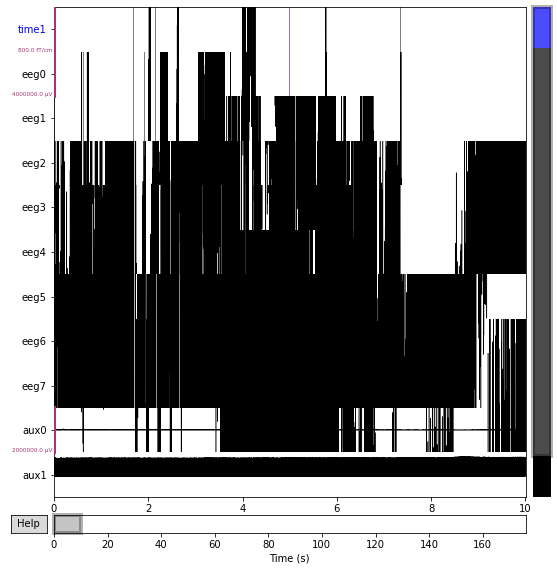

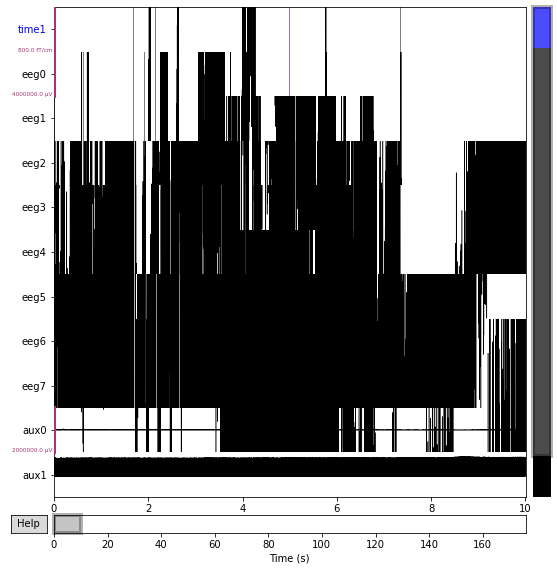

In [121]:
scalings = {'eeg': 2, 'bio': 1, 'time': 1}

raw.plot(n_channels=11, scalings=scalings, title='test',
         show=True, block=True)


# raw.compute_psd().plot(average = False)